**NAME** : **SANJAY**.**R**


**UNIVERSITY** : **VIT** **CHENNAI**

In [29]:
import pandas as pd 

In [30]:
from google.colab import files
uploaded = files.upload()

Saving Iris (2).csv to Iris (2) (1).csv


In [31]:
import io
df1= pd.read_csv(io.BytesIO(uploaded['Iris (2).csv']))

In [32]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
df1.drop(['Id'],axis=1,inplace=True)

In [34]:
df1

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [35]:
df1.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [36]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
np.unique(df1['Species'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [38]:
df1["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


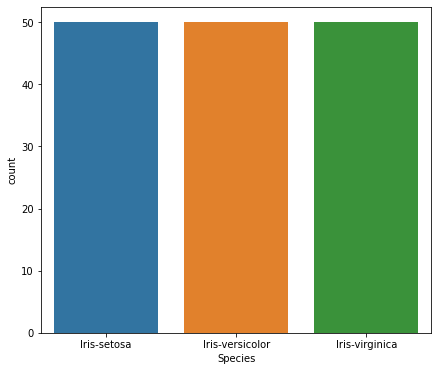

In [39]:
plt.figure(figsize=(7,6))
sns.countplot('Species', data = df1)

In [40]:
X = df1.drop(['Species'], axis = 1)


In [41]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [42]:
Y=df1['Species']

In [43]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size = 0.2,random_state = 3)

In [45]:
from sklearn.tree import DecisionTreeClassifier
P1= DecisionTreeClassifier(criterion = "gini", random_state = 0,max_depth = 5)

In [46]:
P1.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=5, random_state=0)

In [47]:
Pred = P1.predict(X_test)

In [48]:
Pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype=object)

In [49]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [50]:
dot_data = StringIO()
export_graphviz(P1, out_file= dot_data, feature_names=list(X.columns),filled = True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


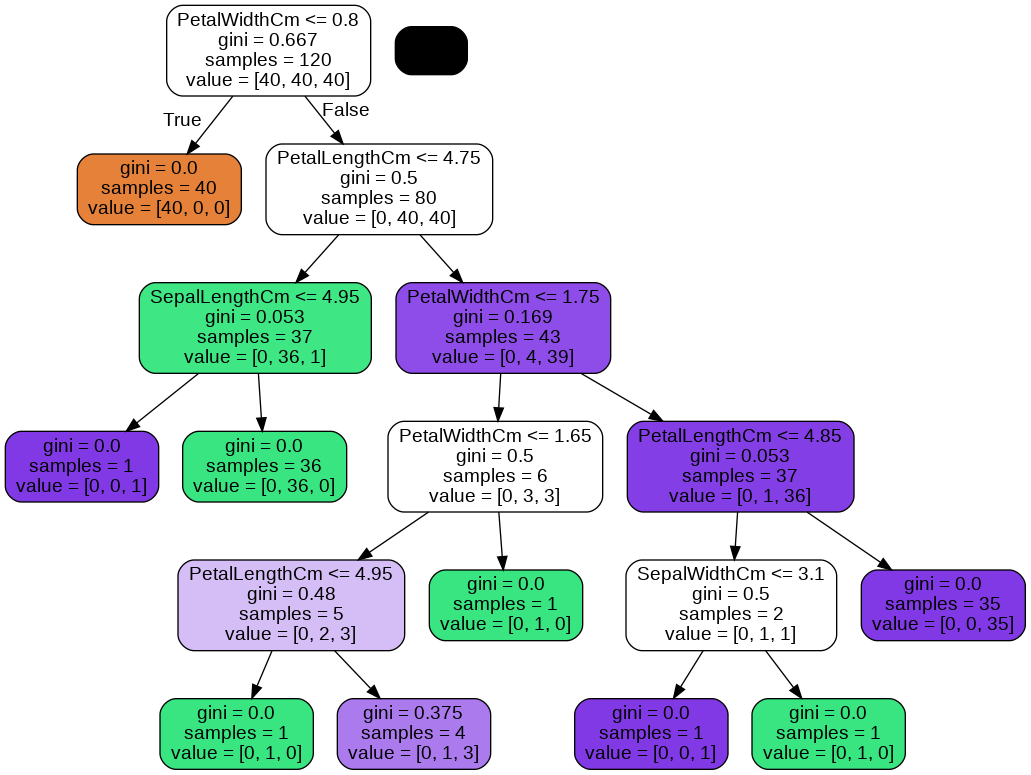

In [51]:
Image(graph.create_png())

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
report = classification_report(Pred, Y_test)


In [53]:
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [54]:
from sklearn import metrics
print("ACCURACY OF THE MODEL IS: ", metrics.accuracy_score(Y_test,Pred))


ACCURACY OF THE MODEL IS:  0.9666666666666667
